# FV5 scheme for Poisson equation on a square

## The Poisson problem on the square

We consider the following Poisson problem with Dirichlet boundary conditions

$$
\left\{\begin{array}{c}
-\Delta u=f \textrm{ on } \Omega\\
u=0 \textrm{ on } \partial\Omega
\end{array}\right.
$$

on the square domain $\Omega= [0,1]\times [0,1]$ with 
$$f=2\pi^2 sin(\pi x) sin(\pi y).$$  
The unique solution of the problem is
$$
u=-sin(\pi x) sin(\pi y).
$$

The Poisson equation is a particular case of the diffusion problem
$$
-\nabla\cdot(K\vec\nabla u)=f
$$
and the associated diffusion flux is
$$
F(u)=\nabla u.
$$

## The FV5 scheme for the Laplace equation

The domain $\Omega$ is decomposed into cells $C_i$.

$|C_i|$ is the measure of the cell $C_i$.

$f_{ij}$ is the interface between two cells $C_i$ and $C_j$. 

$s_{ij}$ is the measure of the interface $f_{ij}$.

$d_{ij}$ is the distance between the centers of mass of the two cells $C_i$ and $C_j$.

The discrete Poisson problem is
$$
-\frac{1}{|C_i|} \sum s_{ij}F_{ij}=f_i,
$$
where
$u_i$ is the approximation of $u$ in the cell $C_i$,

$f_i$ is the approximation of $f$ in the cell $C_i$,

$F_{ij}$ is a numerical approximation of the outward normal diffusion flux from cell $i$ to cell $j$.

In the case of the scheme FV5, we use the formula
$$
F_{ij}=\frac{u_j-u_i}{d_{ij}}.
$$

## The script

In [2]:
#Discrétisation du second membre et extraction du nb max de voisins d'une cellule
#================================================================================
my_RHSfield = cdmath.Field("RHS_field", cdmath.CELLS, my_mesh, 1)
maxNbNeighbours=0#This is to determine the number of non zero coefficients in the sparse finite element rigidity matrix

for i in range(nbCells): 
	Ci = my_mesh.getCell(i)
	x = Ci.x()
	y = Ci.y()

	my_RHSfield[i]=2*pi*pi*sin(pi*x)*sin(pi*y)#mettre la fonction definie au second membre de l edp
	# compute maximum number of neighbours
	maxNbNeighbours= max(1+Ci.getNumberOfFaces(),maxNbNeighbours)

# Construction de la matrice et du vecteur second membre du système linéaire
#===========================================================================
Rigidite=cdmath.SparseMatrixPetsc(nbCells,nbCells,maxNbNeighbours)# warning : third argument is max number of non zero coefficients per line of the matrix
RHS=cdmath.Vector(nbCells)
#Parcours des cellules du domaine
for i in range(nbCells):
	RHS[i]=my_RHSfield[i] #la valeur moyenne du second membre f dans la cellule i
	Ci=my_mesh.getCell(i)
	for j in range(Ci.getNumberOfFaces()):# parcours des faces voisinnes
		Fj=my_mesh.getFace(Ci.getFaceId(j))
		if not Fj.isBorder():
			k=Fj.getCellId(0)
			if k==i :
				k=Fj.getCellId(1)
			Ck=my_mesh.getCell(k)
			distance=Ci.getBarryCenter().distance(Ck.getBarryCenter())
			coeff=Fj.getMeasure()/Ci.getMeasure()/distance
			Rigidite.setValue(i,k,-coeff) # terme extradiagonal
		else:
			coeff=Fj.getMeasure()/Ci.getMeasure()/Ci.getBarryCenter().distance(Fj.getBarryCenter())
		Rigidite.addValue(i,i,coeff) # terme diagonal


# Résolution du système linéaire
#=================================
LS=cdmath.LinearSolver(Rigidite,RHS,500,1.E-6,"GMRES","ILU")
SolSyst=LS.solve()

# Automatic postprocessing :  save 2D picture and plot diagonal data
#===========================
diag_data=VTK_routines.Extract_field_data_over_line_to_numpyArray(my_ResultField,[0,1,0],[1,0,0], resolution)
plt.legend()
plt.xlabel('Position on diagonal line')
plt.ylabel('Value on diagonal line')
if len(sys.argv) >1 :
    plt.title('Plot over diagonal line for finite Volumes \n for Laplace operator on a 2D square '+my_mesh.getName())
    plt.plot(curv_abs, diag_data, label= str(nbCells)+ ' cells mesh')
    plt.savefig("FiniteVolumes2D_square_ResultField_"+str(nbCells)+ '_cells'+"_PlotOverDiagonalLine.png")


NameError: name 'cdmath' is not defined

## Numerical results

### Cartesian meshes

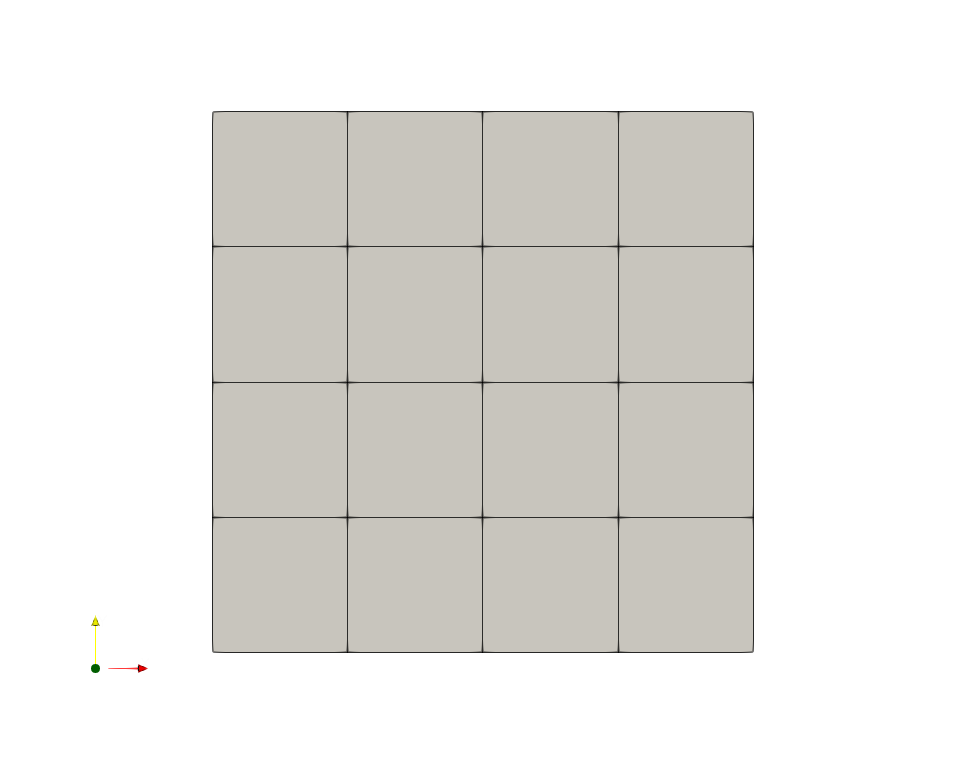

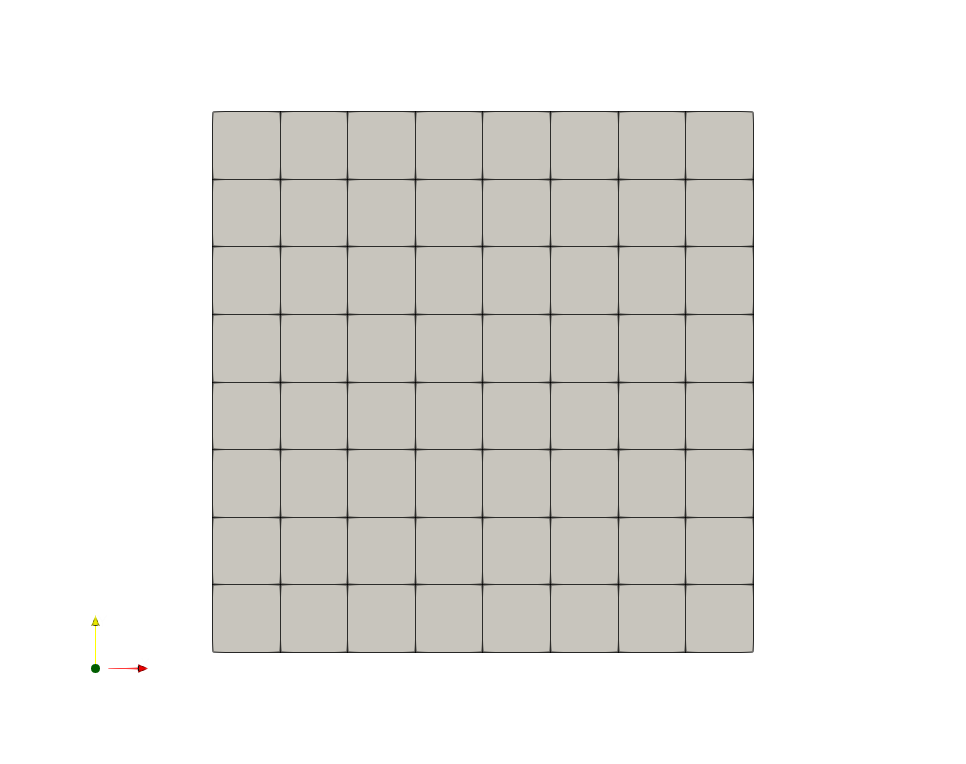

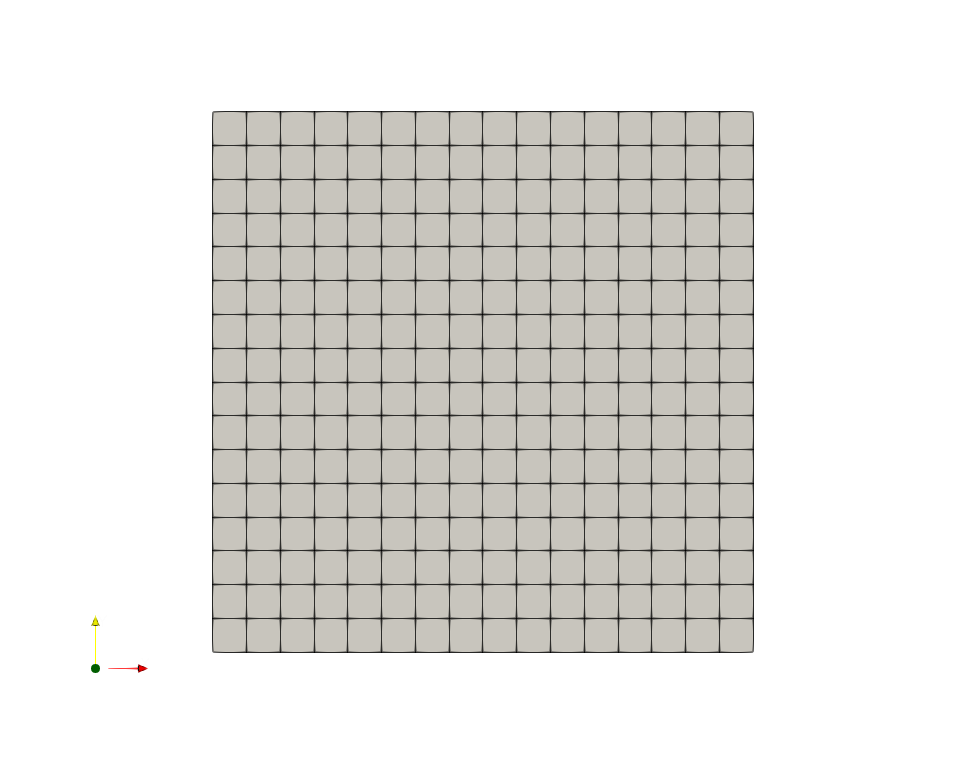

,


In [52]:
from IPython.display import Image, HTML

display(Image("../../ressources/2DCartesien/squareWithSquares_1.png",width=300,height=300))
display(Image("../../ressources/2DCartesien/squareWithSquares_2.png",width=300,height=300))
display(Image("../../ressources/2DCartesien/squareWithSquares_3.png",width=300,height=300))

display(HTML("<table><tr><td><img src='../../ressources/2DCartesien/squareWithSquares_1.png' width=400></td><td><img src='../../ressources/2DCartesien/squareWithSquares_2.png'></td></tr></table>"))


<img src="attachment:/home/ndjinga/Logiciels/CDMATH/CDMATH_SRC/tests/ressources/2DCartesien/squareWithSquares_1.png" width=400>
![](/home/ndjinga/Logiciels/CDMATH/CDMATH_SRC/tests/ressources/2DCartesien/squareWithSquares_1.png)

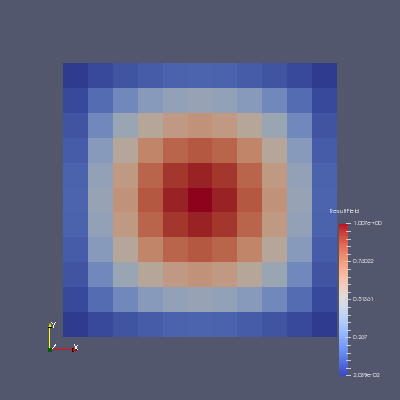

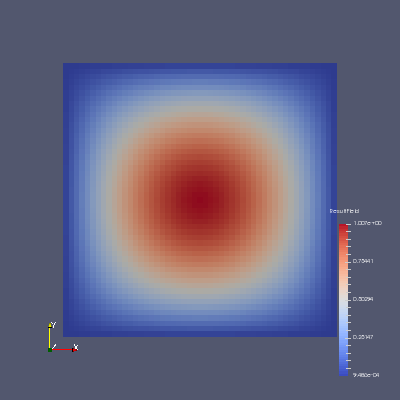

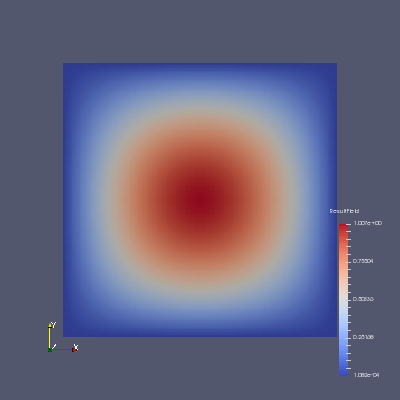

In [54]:
display(Image("../test_validation2DPoissonVF_squares/FiniteVolumes2D_square_ResultField121.png"))
display(Image("../test_validation2DPoissonVF_squares/FiniteVolumes2D_square_ResultField2601.png"))
display(Image("../test_validation2DPoissonVF_squares/FiniteVolumes2D_square_ResultField22801.png"))

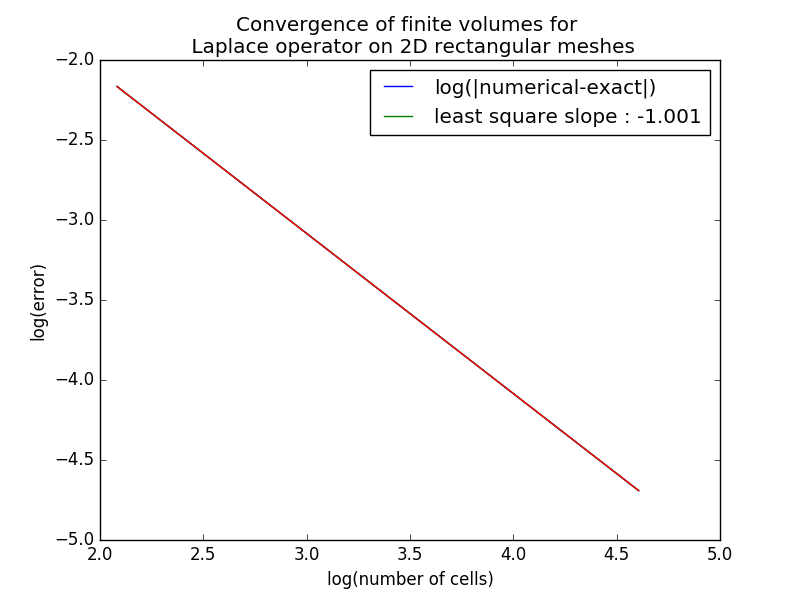

In [16]:
Image("../test_validation2DPoissonVF_squares/meshSquareWithRectanglesFV_2DPoissonFVs_ConvergenceCurve.png")

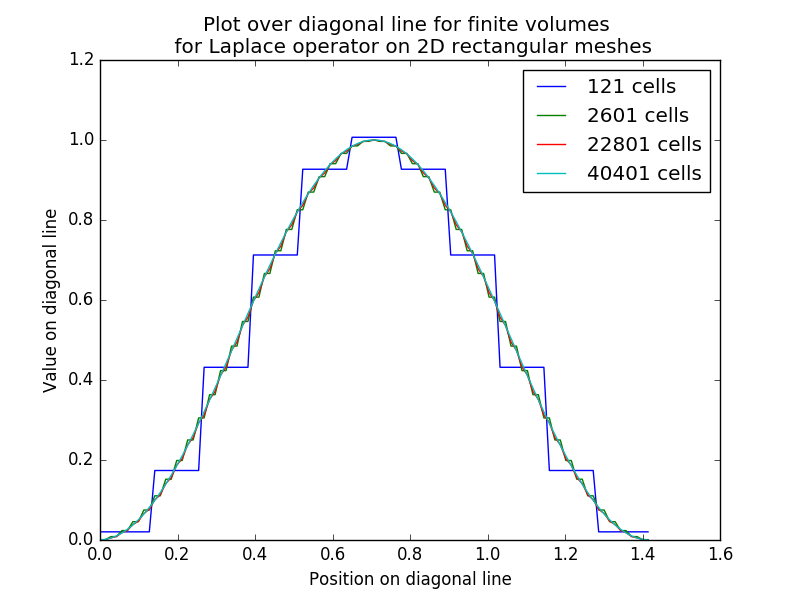

In [17]:
Image("../test_validation2DPoissonVF_squares/meshSquareWithRectanglesFV_2DPoissonFVs_PlotOverDiagonalLine.png")

In [25]:
%ls ../../ressources/2DCartesien/squareWithSquares_1.png

ls: impossible d'accéder à '../../ressources/2DCartesien/squareWithSquares_1.png': Aucun fichier ou dossier de ce type


### Triangular meshes